In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.model_selection import train_test_split
import math
from sklearn.neighbors import DistanceMetric, KNeighborsClassifier
from sklearn import neighbors
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error, r2_score
from sklearn import tree
import graphviz 

# Dados utilizados

# Classificação

# Carregando os dados

In [2]:
Train_Data = pd.read_csv("../../Datasets/heart.csv")
Train_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Descrição das colunas

1. __Age__ is the age of candidate.
2. __Sex__ has numeric values. 1 denotes male and 0 denotes female.
3. __Chest Pain__ pain has values between 0-3. The types of angina that are described in the research paper. The higher the number, the lesser are the odds of heart attack.
4. __Resting blood pressure__ is normal pressure with no exercise.
5. __Cholesterol__ means the blockage for blood supply in the blood vessels.
6. __Fasting Blood Pressure__ is blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning. 1 denotes > 120 mg/dl 
7. __Rest ECG (electrocardiographic) results__ means ECG values taken while person is on rest which means no exercise and normal functioning of heart is happening. Values 0,1,2.
8. __The Maximum Heart Rate achieved__.
9. __Exercise induced angina__ is chest pain while exercising or doing any physical activity. 1 denotes presence and 0 denotes absence.
10. __Oldpeak__ = ST Depression induced by exercise relative to rest. ST Depression is the difference between value of ECG at rest and after exercise.
11. __ST Slope__ is the tangent to the depression value.
12. __The number of major blood vessels (0-3) supplying blood to heart blocked__.
13. __The Types of thalassemia__.
14. __Heart attack prediction__ where 1 denotes Heart attack occured and 0 where it din't take occur.

In [3]:
Train_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


# Checar se as classes estão balanceadas

In [4]:
Train_Data['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

# Checar se existem dados duplicados

In [5]:
print("Duplicated values: ", Train_Data.duplicated().sum())
duplicate = Train_Data[Train_Data.duplicated()]
duplicate

Duplicated values:  1


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


### Remover dados duplicados, deixando apenas a primeira ocorrência

In [6]:
Train_Data.drop_duplicates(keep='first',inplace=True) 
Train_Data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# Checar se existem dados faltantes

In [7]:
print("Missing values: ", Train_Data.isnull().sum().sum())

Missing values:  0


# Checar se existem correlações entre os atributos e a saída

In [8]:
corr = Train_Data.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


## Dividir atributos e saída

In [9]:
X=Train_Data[Train_Data.columns[Train_Data.columns!='target']]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
Y=Train_Data['target']

# Separar treinamento e teste

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

## Resultados a serem imprimidos

In [12]:
def results(y_test,y_pred):
    results = confusion_matrix(y_test, y_pred)
    print ('Confusion Matrix :')
    print(results)
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print ('Report : ')
    print (classification_report(y_test, y_pred))

# Árvore de decisão

## Classificação

In [13]:
def computeClassificationDecisionTree(X_train, X_test, y_train, y_test,printResults):
    
    arvore_classificacao = tree.DecisionTreeClassifier()
    arvore_classificacao.fit(X_train,y_train)
    y_pred = arvore_classificacao.predict(X_test)
    if printResults:
        results(y_test, y_pred)
    return y_pred,arvore_classificacao


In [14]:
y_pred,arvore_classificacao = computeClassificationDecisionTree(X_train, X_test, y_train, y_test, True)

Confusion Matrix :
[[22  5]
 [ 8 26]]
Accuracy: 78.69%
Report : 
              precision    recall  f1-score   support

           0       0.73      0.81      0.77        27
           1       0.84      0.76      0.80        34

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



## Plotando as regras criadas

In [15]:
dot_data = tree.export_graphviz(arvore_classificacao, out_file=None) 

In [16]:
graph = graphviz.Source(dot_data)
graph.render("heart")

'heart.pdf'

In [17]:
X_train.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')

In [18]:
dot_data = tree.export_graphviz(arvore_classificacao, out_file=None, 
                      feature_names=X_train.columns,  
                      class_names=['não infarto','infarto'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)

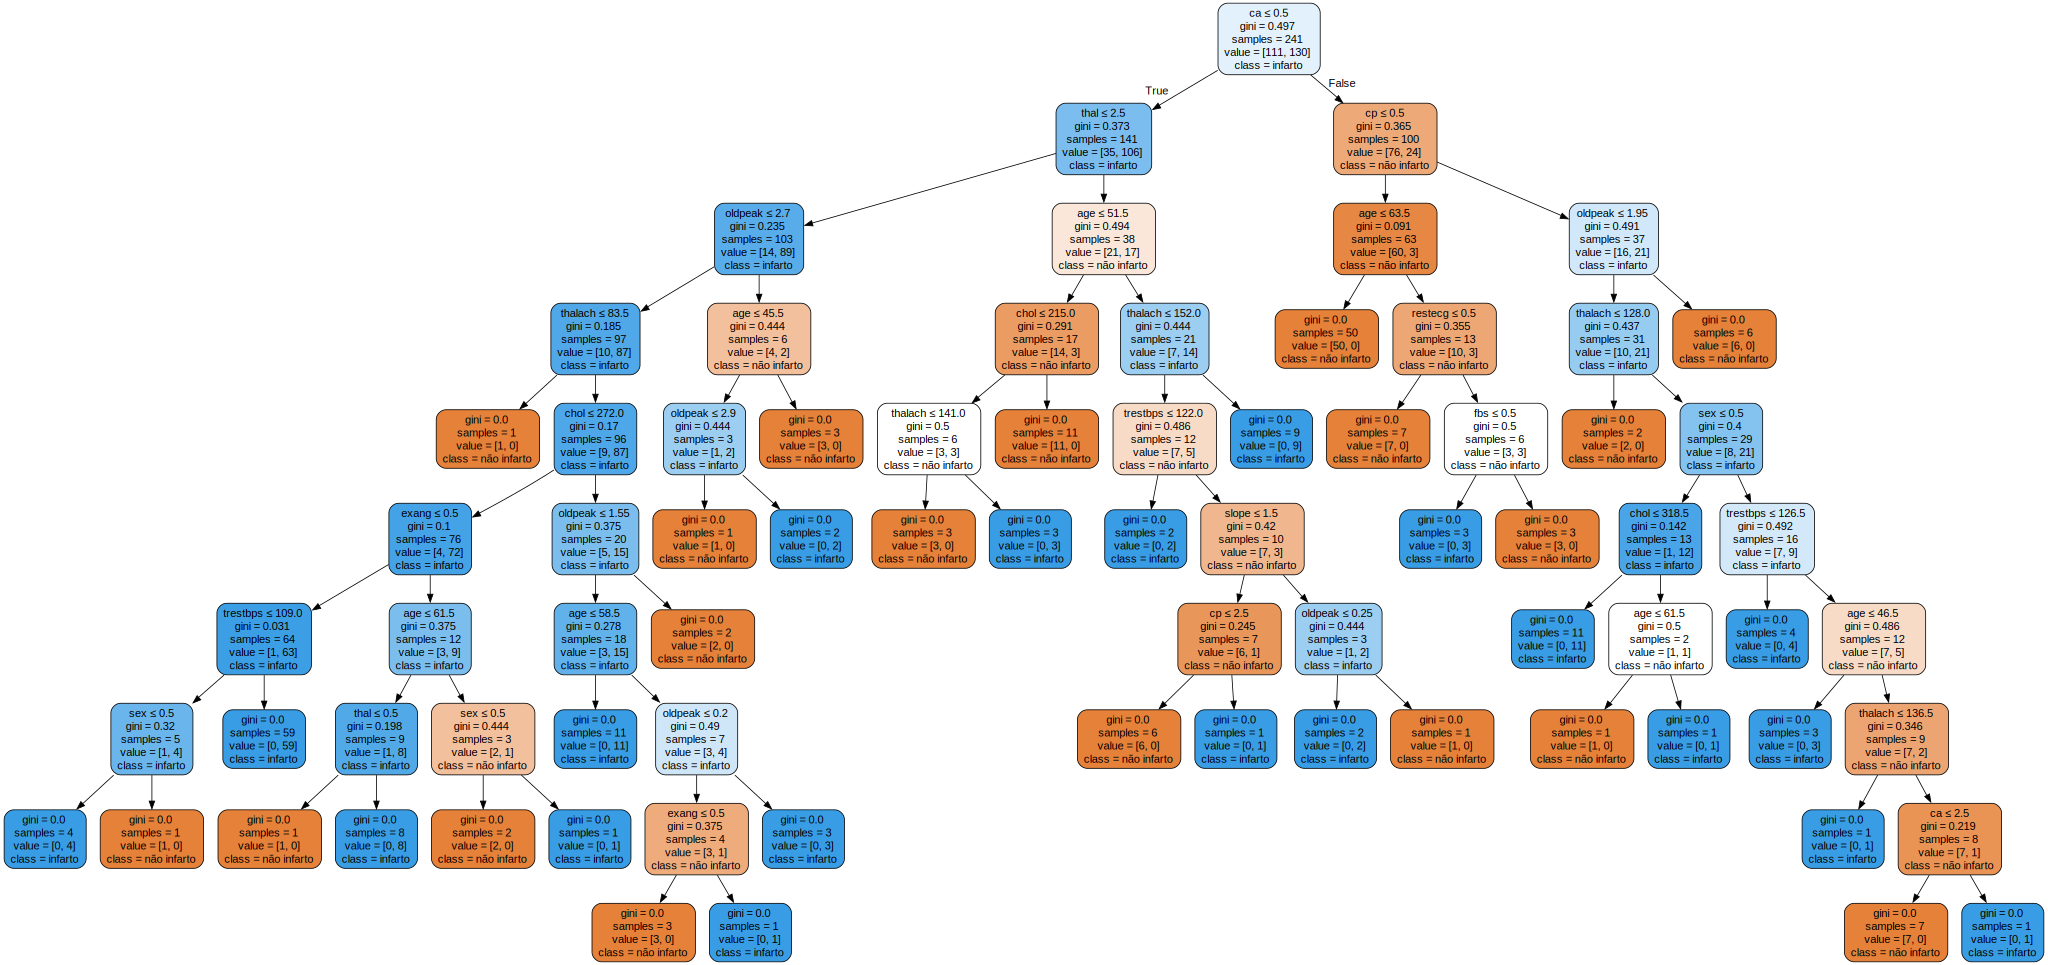

In [19]:
graph

In [20]:
graph.render("heart2")

'heart2.pdf'

## Regressão

In [21]:
df = pd.read_csv('../../Datasets/diamonds.csv', sep = ",", low_memory=False)
#removendo os ids
df = df.drop(df.columns[0], axis=1)
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**price**: price in US dollars (\$326--\$18,823)

**carat**: weight of the diamond (0.2--5.01)

**cut**: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

**color**: diamond colour, from J (worst) to D (best)

**clarity**: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

**x**: length in mm (0--10.74)

**y**: width in mm (0--58.9)

**z**: depth in mm (0--31.8)

**depth**: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

**table**: width of top of diamond relative to widest point (43--95)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


## One Hot Encoding

Transformar atributos nominais em numéricos

In [23]:
le = preprocessing.LabelEncoder()
for column in df.columns:
    if(df[column].dtypes=='object'):
        df[column] = le.fit_transform(df[column])
        
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75


In [24]:
print("Missing values: ", df.isnull().sum())

Missing values:  carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64


### Checando se existem dados duplicados, preservando a primeira ocorrência:

In [25]:
print("Duplicated values: ", df.duplicated().sum())

#Checando quais são as linhas duplicadas
duplicateRowsDF = df[df.duplicated()]
#duplicateRowsDF

#Removendo as linhas duplicadas, deixando apenas a primeira ocorrência
df.drop_duplicates(keep='first',inplace=True) 
#df

Duplicated values:  146


In [26]:
corr = df.corr()
corr.style.background_gradient(cmap = 'coolwarm')

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017785,0.291019,-0.214068,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
cut,0.017785,1.000000,0.000393,0.028141,-0.193184,0.150366,0.040196,0.022592,0.027805,0.002442
color,0.291019,0.000393,1.000000,-0.028002,0.047572,0.026102,0.171825,0.269876,0.263153,0.267825
clarity,-0.214068,0.028141,-0.028002,1.000000,-0.053165,-0.088074,-0.071218,-0.225575,-0.217459,-0.224117
depth,0.027861,-0.193184,0.047572,-0.053165,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,0.150366,0.026102,-0.088074,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,0.040196,0.171825,-0.071218,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,0.022592,0.269876,-0.225575,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,0.027805,0.263153,-0.217459,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.002442,0.267825,-0.224117,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


### Separando o alvo (preço) dos atributos

In [27]:
target = pd.DataFrame(df, columns=["price"])

In [28]:
X = df.drop(df.columns[6], axis=1)
y = target

### Separando aleatoriamente a base de treino (80% da base original) e a base de teste (20% da base original)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [30]:
def results_regression(y_test,y_pred):
    mse = mean_squared_error(y_test,y_pred)
    print(f"mse: {mse}")
    rmse = math.sqrt(mse)
    print(f"rmse: {rmse}")
    mae = mean_absolute_error(y_test,y_pred)
    print(f"mae: {mae}")
    mape = mean_absolute_percentage_error(y_test,y_pred)
    print(f"mape: {mape}")
    r2 = r2_score(y_test,y_pred)
    print(f"r2_score {r2}")


In [31]:
def computeRegressionDecisionTree(X_train, X_test, y_train, y_test,printResults):
    arvore_regressao = tree.DecisionTreeRegressor()
    arvore_regressao.fit(X_train,y_train)
    y_pred = arvore_regressao.predict(X_test)
    if printResults:
        results_regression(y_test, y_pred)
    return y_pred,arvore_regressao

In [32]:
y_pred,arvore_regressao = computeRegressionDecisionTree(X_train, X_test, y_train, y_test, True)

mse: 546023.3275862068
rmse: 738.9339128678605
mae: 360.754438144809
mape: 0.08504842809450419
r2_score 0.9658403681484962


In [33]:
df = pd.DataFrame()
df['true'] = y_test
df['pred'] = y_pred
df

,true,pred
28297,432,442.0
17356,6964,6591.0
48882,2037,1982.0
19901,8451,7127.0
44377,1581,1813.0
...,...,...
42801,1351,1158.0
44262,1575,1699.0
5811,3911,4463.0
1858,3066,3701.0


In [34]:
df['diff'] = df['true'] - df['pred']
df

,true,pred,diff
28297,432,442.0,-10.0
17356,6964,6591.0,373.0
48882,2037,1982.0,55.0
19901,8451,7127.0,1324.0
44377,1581,1813.0,-232.0
...,...,...,...
42801,1351,1158.0,193.0
44262,1575,1699.0,-124.0
5811,3911,4463.0,-552.0
1858,3066,3701.0,-635.0


In [37]:
abs(df['diff']).sum()/len(df)

360.754438144809